In [2]:
cd ..

/Users/crupley/gal/hoodie


In [91]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pickle

import networkx as nx
from sklearn.preprocessing import StandardScaler

from code.featurize import *

plt.rcParams['figure.figsize'] = 16, 10

In [20]:
from code.graph import make_edges

In [7]:
df = pickle.load(open('features.pkl', 'rb'))
df.index.name = 'node'
df.head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
node,,,,,,,,,,,
0,37.750067,-122.441075,718895.248337,-0.000153,-0.014650,0.158808,123.369982,-0.035714,1.806452,112,80.172298
1,37.750196,-122.438933,834313.797096,-0.002185,0.169033,-0.076971,105.325899,0.039474,2.375000,152,83.318625
2,37.756794,-122.436270,900225.127625,-0.012031,0.008118,0.125270,143.830470,-0.284672,1.902778,137,93.471872
3,37.753529,-122.437050,820289.998581,0.218998,0.471783,0.216543,110.432877,-0.019108,2.308824,157,91.519785
4,37.755758,-122.433400,776981.611641,-0.008045,-0.010146,0.052978,137.947900,-0.065789,2.140845,152,92.032526


In [ ]:
df[df.lat > latmin]

In [49]:
tn = 175
testnode = df.ix[tn]

dfsmall = window(df, testnode.lat - 0.005,
                     testnode.lat + 0.005,
                     testnode.lon - 0.003,
                     testnode.lon + 0.003)[['lat', 'lon']]
print dfsmall.shape
dfsmall.head()

(46, 2)


,lat,lon
node,,
105,37.765334,-122.421672
107,37.762815,-122.420569
108,37.760968,-122.420394
173,37.766146,-122.421749
175,37.762251,-122.419786


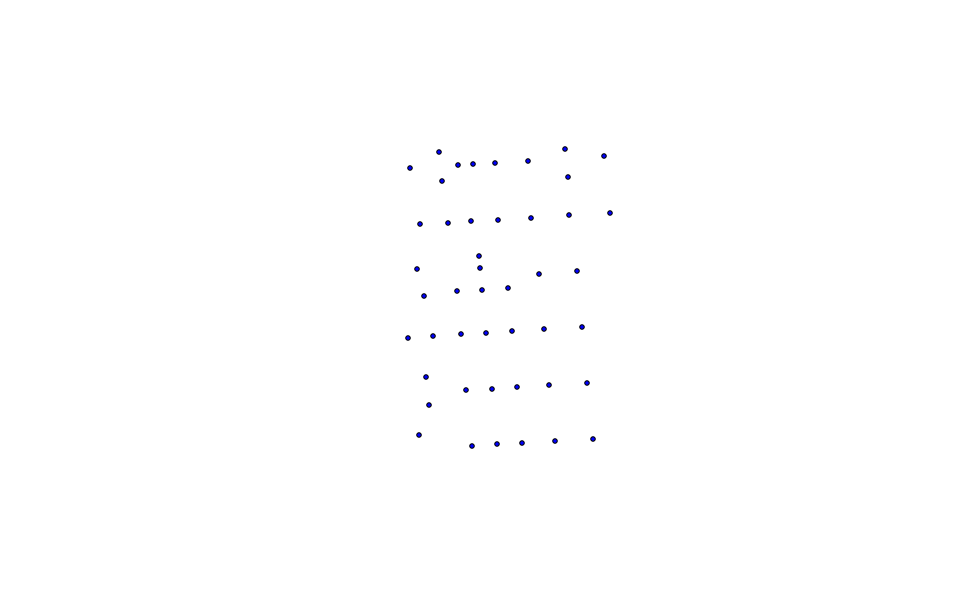

In [28]:
dfsmall.plot(kind='scatter', x = 'lon', y = 'lat')
plt.margins(0)
plt.axis('equal')
plt.axis('off');

In [30]:
%time edges = make_edges(dfsmall)
print edges.shape
edges.head()

CPU times: user 3.52 s, sys: 46.7 ms, total: 3.56 s
Wall time: 3.57 s
(167, 2)


,node1,node2
edge,,
0,105,6952
1,105,173
2,105,2164
3,105,6500
4,107,6659


In [ ]:
edges['dist'] = edges.apply(lambda x: dist_by_node(x.node1, x.node2, df), axis=1)

In [80]:
edges.head()

,node1,node2,dist
edge,,,
0,105,6952,0.000631
1,105,173,0.000816
2,105,2164,0.000977
3,105,6500,0.001221
4,107,6659,0.000361


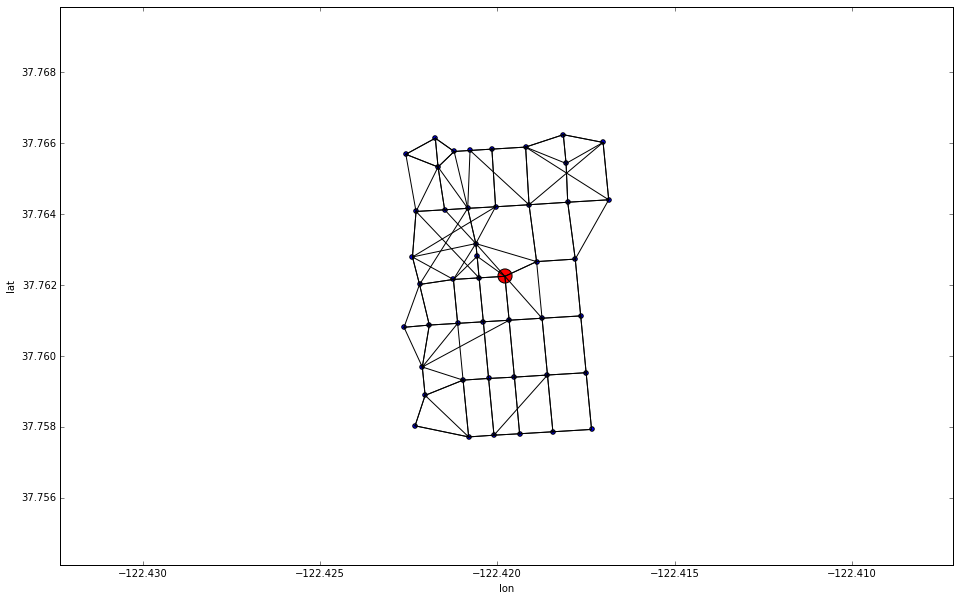

In [59]:
dfsmall.plot(kind='scatter', x = 'lon', y = 'lat')

for idx in edges.index:
    node1 = edges.ix[idx].node1
    node2 = edges.ix[idx].node2

    plt.plot([dfsmall.ix[node1].lon, dfsmall.ix[node2].lon],
             [dfsmall.ix[node1].lat, dfsmall.ix[node2].lat], c='black')

plt.scatter(dfsmall.ix[tn].lon, dfsmall.ix[tn].lat, c='red', s=200)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.axis('equal')
plt.margins(0)

# Make graph

In [65]:
g = nx.from_pandas_dataframe(edges, 'node1', 'node2')

In [73]:
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 46
Number of edges: 100
Average degree:   4.3478


In [69]:
g[tn]

{107: {}, 273: {}, 2617: {}, 6417: {}, 6659: {}, 6662: {}}

In [75]:
list(nx.all_neighbors(g, tn))

[6659, 6662, 273, 107, 6417, 2617]

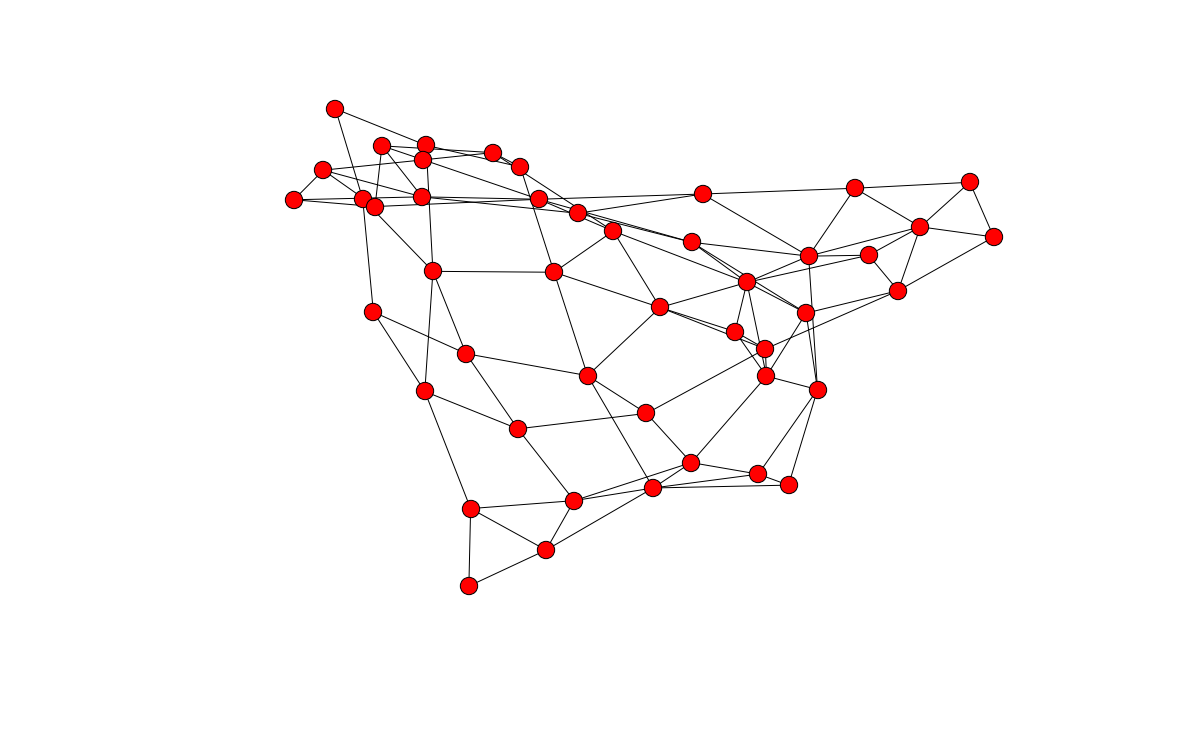

In [68]:
nx.draw(g)

# Graph with weights

In [82]:
edges.head()

,node1,node2,dist
edge,,,
0,105,6952,0.000631
1,105,173,0.000816
2,105,2164,0.000977
3,105,6500,0.001221
4,107,6659,0.000361


In [84]:
df.head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
node,,,,,,,,,,,
0,37.750067,-122.441075,718895.248337,-0.000153,-0.014650,0.158808,123.369982,-0.035714,1.806452,112,80.172298
1,37.750196,-122.438933,834313.797096,-0.002185,0.169033,-0.076971,105.325899,0.039474,2.375000,152,83.318625
2,37.756794,-122.436270,900225.127625,-0.012031,0.008118,0.125270,143.830470,-0.284672,1.902778,137,93.471872
3,37.753529,-122.437050,820289.998581,0.218998,0.471783,0.216543,110.432877,-0.019108,2.308824,157,91.519785
4,37.755758,-122.433400,776981.611641,-0.008045,-0.010146,0.052978,137.947900,-0.065789,2.140845,152,92.032526


In [94]:

fsmall = window(df, testnode.lat - 0.005,
                     testnode.lat + 0.005,
                     testnode.lon - 0.003,
                     testnode.lon + 0.003).iloc[:,2:]

ssc = StandardScaler()
fsc = ssc.fit_transform(fsmall)
fsc = pd.DataFrame(fsc)
fsc.columns = fsmall.columns
fsc.index = fsmall.index
fsc.head()

print fsc.shape
fsc.head()

(46, 9)


,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
node,,,,,,,,,
105,0.386480,0.372280,1.930770,0.342729,-0.097387,0.912188,3.176784,-1.080922,0.555957
107,-1.026109,-1.067780,0.493938,0.004501,-0.236062,-0.115211,0.148029,-0.609768,1.041522
108,0.238459,-0.946193,1.117123,-0.023996,-0.646480,0.408044,0.177465,0.850808,0.478046
173,-0.060299,1.195522,0.565683,0.613726,0.183522,-2.025345,-1.741609,-0.766819,-0.111889
175,-0.713990,-0.079983,1.581435,0.769141,-0.222883,-1.499980,-1.365841,-1.073069,0.942311


In [100]:
edges['sim'] = edges.apply(lambda x: sim_by_node(int(x.node1), int(x.node2), fsc), axis = 1)
edges.head()

,node1,node2,dist,sim
edge,,,,
0,105,6952,0.000631,0.261020
1,105,173,0.000816,0.166074
2,105,2164,0.000977,0.209379
3,105,6500,0.001221,0.197152
4,107,6659,0.000361,0.416979


In [116]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 4 columns):
node1    167 non-null int64
node2    167 non-null int64
dist     167 non-null float64
sim      167 non-null float64
dtypes: float64(2), int64(2)
memory usage: 6.5 KB


In [143]:
g = nx.from_pandas_dataframe(edges[['node1', 'node2']], 'node1', 'node2') #getattr=True
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 46
Number of edges: 100
Average degree:   4.3478


In [144]:
g[tn]

{107: {}, 273: {}, 2617: {}, 6417: {}, 6659: {}, 6662: {}}

In [145]:
g.neighbors(tn)

[6659, 6662, 273, 107, 6417, 2617]

In [113]:
g.edge[tn][6659]['sim']

0.34651658088449905

In [188]:
n1 = {g.neighbors(tn)[0]} #set(g.neighbors(tn))
n2 = set([val for sublist in [g.neighbors(i) for i in n1] for val in sublist if val not in n1.union({tn})])
n3 = set([val for sublist in [g.neighbors(i) for i in n2] for val in sublist if val not in n2.union(n1).union({tn})])

print 'n1', n1
print 'n2', n2
print 'n3', n3

n1 set([6659])
n2 set([6656, 6338, 6500, 6661, 107, 2613, 2617])
n3 set([3015, 6952, 105, 6956, 6765, 6415, 6417, 273, 2614, 6953, 4061])


In [186]:
{6}

{6}

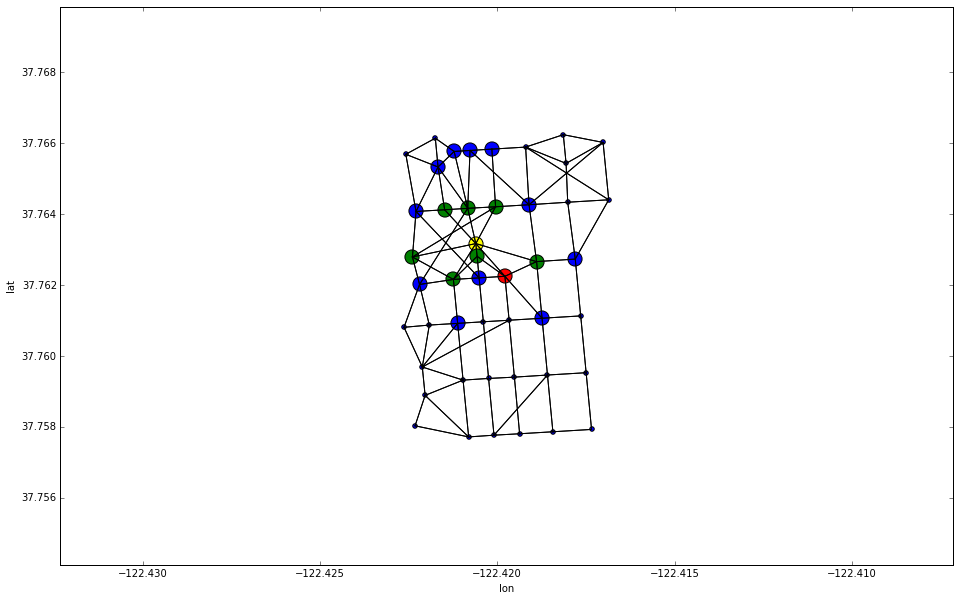

In [189]:
dfsmall.plot(kind='scatter', x = 'lon', y = 'lat')

for node1 in g.nodes_iter():
    for node2 in g.neighbors(node1):

        plt.plot([dfsmall.ix[node1].lon, dfsmall.ix[node2].lon],
                 [dfsmall.ix[node1].lat, dfsmall.ix[node2].lat], c='black')

plt.scatter(dfsmall.ix[tn].lon, dfsmall.ix[tn].lat, c='red', s=200)

for i in n1:
    plt.scatter(dfsmall.ix[i].lon, dfsmall.ix[i].lat, c='yellow', s=200)

for i in n2:
    plt.scatter(dfsmall.ix[i].lon, dfsmall.ix[i].lat, c='green', s=200)
    
for i in n3:
    plt.scatter(dfsmall.ix[i].lon, dfsmall.ix[i].lat, c='blue', s=200)



ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.axis('equal')
plt.margins(0)